# Übung 

Build a model to predict Fashion MNIST using CNN
- Preparation
- Building
- Training
- Saving the model
- Send the accuracy (train, val) via an E-Mail (without Standort, but prepare the solution or Test via Trainer PC)
- Store the accuracy (train, val) into  SQLite DB / CSV (as exception)
  - Date, Time, Trainig ID (PK), train_accuracy, validation_accuracy

Delivery as 
1. Python Application (Functional or OOP)


**FOCUS on working application first of all, then optimize it and make it pretty**

# Dataset locally (Proxy)

For the dataset (locally)
1. Download the dataset manually from : https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion
2. Create Folder Called **datasets\fashion-mnist** under C:\Users\Administrator\.keras\
   So you will have C:\Users\Administrator\\.keras\datasets\fashion-mnist

3. Copy the 4x Downloaded files into the created folder

In [78]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
import pandas as pd


In [79]:
# Load the dataset

(X_train, y_train), (X_test,y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [80]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [81]:
X_train[0].shape

(28, 28)

In [82]:
# Normalizing the data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [83]:
X_train.ndim

3

# 1 Building ANN without hidden layers 'using reshape method in input layer'
 Traing the model without any hidden layer

In [84]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [85]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.5988 - accuracy: 0.7991
Epoch 2/5
1875/1875 [==============================] - 2s 915us/step - loss: 0.4621 - accuracy: 0.8418
Epoch 3/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.4362 - accuracy: 0.8499
Epoch 4/5
1875/1875 [==============================] - 2s 867us/step - loss: 0.4220 - accuracy: 0.8539
Epoch 5/5
1875/1875 [==============================] - 2s 869us/step - loss: 0.4129 - accuracy: 0.8577


In [86]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 750us/step - loss: 0.4552 - accuracy: 0.8412


[0.45522618293762207, 0.8411999940872192]

In [87]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 946us/step


In [88]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [89]:
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [90]:
# creating confusion matriy
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[866,   3,  16,  34,   6,   0,  56,   0,  19,   0],
       [  6, 960,   5,  20,   5,   0,   2,   0,   2,   0],
       [ 22,   7, 761,   7, 146,   1,  45,   0,  11,   0],
       [ 48,  18,  19, 842,  36,   0,  31,   0,   6,   0],
       [  0,   2, 117,  32, 793,   0,  47,   0,   9,   0],
       [  0,   0,   0,   1,   0, 906,   0,  57,   6,  30],
       [187,   3, 159,  28, 150,   0, 439,   0,  34,   0],
       [  0,   0,   0,   0,   0,  27,   0, 923,   0,  50],
       [  5,   1,   7,   9,   2,   3,   9,   4, 960,   0],
       [  0,   0,   0,   0,   0,   7,   1,  29,   1, 962]])>

Text(69.0, 0.5, 'Truth')

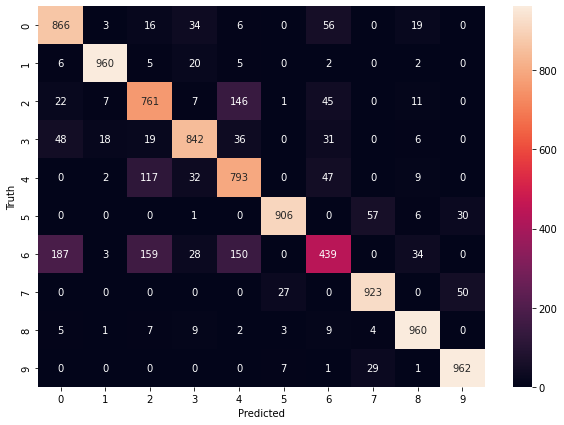

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 2 Using Hidden layer to compare above results

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5060 - accuracy: 0.8226
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3800 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3155 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2972 - accuracy: 0.8901


In [93]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8686


[0.36946403980255127, 0.8686000108718872]

313/313 [==============================] - 0s 894us/step


Text(69.0, 0.5, 'Truth')

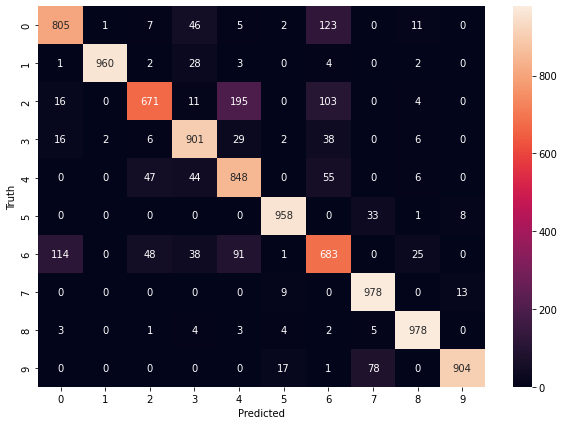

In [94]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# We can see much improvements using hidden layer in our model.


# 3 Using Flattern method  so that we dont have to call .reshape on input data, just another way of training model

In [95]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(300, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=3)

# Here i used just 3 epoch just to make computatin faster but using more epoch will increase the accuracy and minimize the loss percentage

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7011 - accuracy: 0.7639
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4771 - accuracy: 0.8328
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4323 - accuracy: 0.8481


In [96]:
ann.evaluate(X_test,y_test)



313/313 [==============================] - 2s 1ms/step - loss: 0.4512 - accuracy: 0.8393


[0.4512467682361603, 0.8392999768257141]

313/313 [==============================] - 1s 1ms/step


Text(69.0, 0.5, 'Truth')

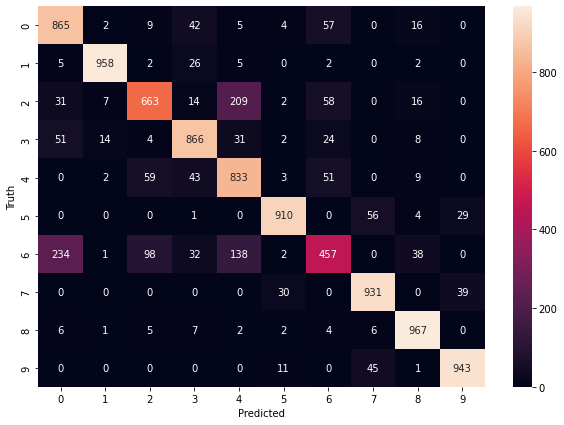

In [97]:
y_predicted2=ann.predict(X_test)
y_predicted_labels2= [np.argmax(i) for i in y_predicted2]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)

# creating confusion matriy heat max to demonstrate true y_test values vs predicted X_test values from the trained model.

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_predicted_labels2))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1000
           1       0.97      0.96      0.97      1000
           2       0.79      0.66      0.72      1000
           3       0.84      0.87      0.85      1000
           4       0.68      0.83      0.75      1000
           5       0.94      0.91      0.93      1000
           6       0.70      0.46      0.55      1000
           7       0.90      0.93      0.91      1000
           8       0.91      0.97      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



# 4  Now we will use CNN(Convolutional Neural Network ) to train the fashion mnist data 

In [107]:
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=44, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                             # using also droupout layer
    layers.Dense(10, activation='softmax')
])

In [123]:
cnn.summary()  # Getting the summary of CNn2d and different hidden layers and other important information.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 44)        11132     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 44)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1100)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [108]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
history=cnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 26s 60ms/step - loss: 0.8038 - accuracy: 0.7154 - val_loss: 0.4485 - val_accuracy: 0.8358
Epoch 2/10
422/422 [==============================] - 24s 57ms/step - loss: 0.5093 - accuracy: 0.8189 - val_loss: 0.3760 - val_accuracy: 0.8610
Epoch 3/10
422/422 [==============================] - 25s 60ms/step - loss: 0.4495 - accuracy: 0.8417 - val_loss: 0.3438 - val_accuracy: 0.8715
Epoch 4/10
422/422 [==============================] - 25s 58ms/step - loss: 0.4125 - accuracy: 0.8549 - val_loss: 0.3218 - val_accuracy: 0.8797
Epoch 5/10
422/422 [==============================] - 24s 58ms/step - loss: 0.3897 - accuracy: 0.8624 - val_loss: 0.3028 - val_accuracy: 0.8842
Epoch 6/10
422/422 [==============================] - 25s 59ms/step - loss: 0.3698 - accuracy: 0.8689 - val_loss: 0.2923 - val_accuracy: 0.8905
Epoch 7/10
422/422 [==============================] - 25s 59ms/step - loss: 0.3558 - accuracy: 0.8745 - val_loss: 0.2828 - val_accuracy:

With CNN, at the end 5 epochs, accuracy was at around 90% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [110]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2923 - accuracy: 0.8958


[0.29231080412864685, 0.895799994468689]

In [117]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.0174990e-10, 3.4812277e-12, 1.0572328e-11, 1.6899408e-10,
        5.6403823e-12, 1.4728941e-04, 1.0200646e-10, 1.2704389e-03,
        3.0327460e-08, 9.9858224e-01],
       [3.0528299e-06, 2.0683767e-13, 9.9946445e-01, 1.7364515e-08,
        1.1800042e-04, 5.7731479e-16, 4.1456128e-04, 1.4243426e-19,
        2.3624942e-09, 4.4802287e-15],
       [1.1662317e-08, 1.0000000e+00, 1.7194267e-10, 4.5170170e-09,
        6.7074540e-11, 3.2482250e-14, 2.2067224e-10, 1.7682175e-17,
        2.5263935e-10, 1.4848081e-17],
       [1.2681457e-09, 1.0000000e+00, 2.0105730e-11, 1.8768352e-08,
        5.3365651e-10, 4.3043399e-14, 3.5939701e-10, 1.1410984e-17,
        2.5946034e-12, 3.9307346e-18],
       [4.9810447e-02, 2.9255202e-06, 3.8060907e-02, 1.1348918e-02,
        5.0708428e-02, 3.2866126e-05, 8.4981924e-01, 2.0911330e-07,
        1.9472266e-04, 2.1371288e-05]], dtype=float32)

In [118]:
y_classes = [np.argmax(element) for element in y_pred_cnn]
y_classes[:5]

[9, 2, 1, 1, 6]

In [119]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

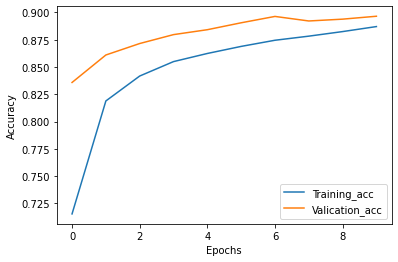

In [120]:
# Plotting the accuracy (validiation accuracy vs train accuracy)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_acc", "Valication_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [121]:
# printing the classification report.

print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.82      0.87      0.85      1000
           3       0.88      0.91      0.89      1000
           4       0.80      0.87      0.83      1000
           5       0.99      0.96      0.98      1000
           6       0.78      0.59      0.67      1000
           7       0.93      0.98      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



Text(69.0, 0.5, 'Truth')

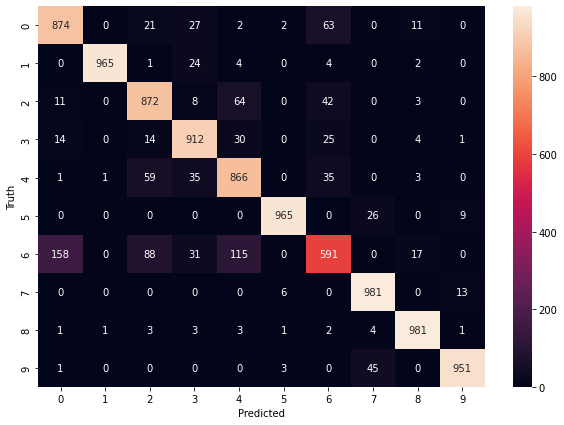

In [122]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

# creating confusion matriy heat max to demonstrate true y_test values vs predicted X_test values from the trained model.

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# We can see that our confusion matriy looks much better with CNN .

# saving the Model

In [124]:
# saving the whole model of CNN
cnn.save("./models/fashion_mnist_1.h5")

# saving only weights
cnn.save_weights("./models/fashion_mnist_1_weights.h5")

In [126]:
# Load the model

from tensorflow.keras.models import load_model

new_model = load_model("./models/fashion_mnist_1.h5")

new_model.summary()

#new_model.get_weights()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 44)        11132     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 44)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1100)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [ ]:
# # Load Weights

# model_2 = models.Sequential(                                            # This configuration  has to match the exact model weights which we are loading.
#     [
#         layers.Dense(512, activation="sigmoid", input_shape=(784,)),
#         layers.Dense(10, activation="sigmoid")
#     ]
# )


# model_2.load_weights("./models/fashion_mnist_1_weights.h5")

# model_2.get_weights()